<a href="https://colab.research.google.com/github/viridis45/Python-data-analysis/blob/master/07312019_intro_reg%2C_knn%2C_rf%2C_lc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

root = '/content/drive/My Drive/T4IR/colab/0730data/'
df=pd.read_csv(root+'housing_kaggle/train.csv')

# EDA
always start with eda yee

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


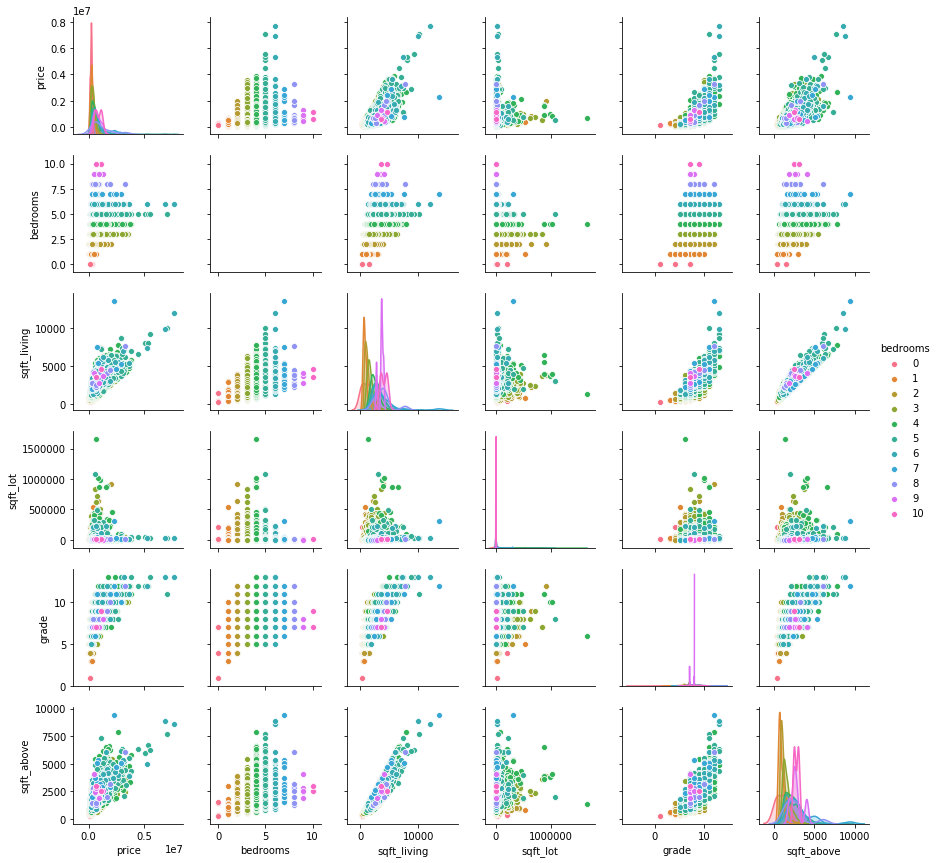

In [0]:
import seaborn as sns
cols = ['price', 'bedrooms', 'sqft_living',
       'sqft_lot', 'grade',
       'sqft_above']

sns.plotting_context(font_scale=1.5)
sns.pairplot(df[cols], hue='bedrooms', size=2)


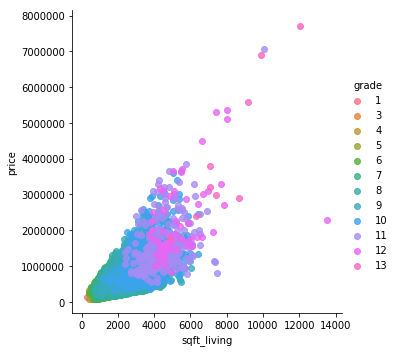

In [0]:
sns.lmplot(x='sqft_living', y='price', hue='grade', data=df, fit_reg=False)

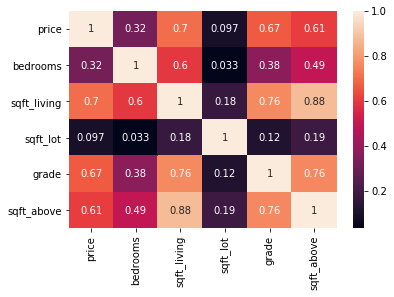

In [0]:
sns.heatmap(df[cols].corr(), annot=True)

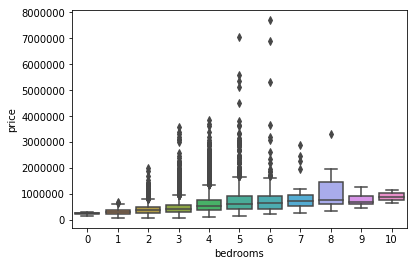

In [0]:
sns.boxplot(x=df['bedrooms'], y=df['price'])

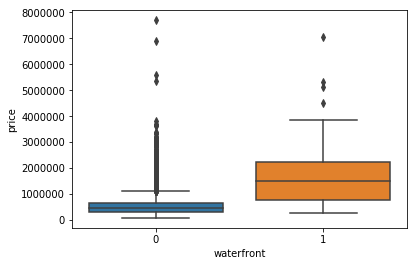

In [0]:
sns.boxplot(x=df['waterfront'], y=df['price'])

[(0, 250000)]

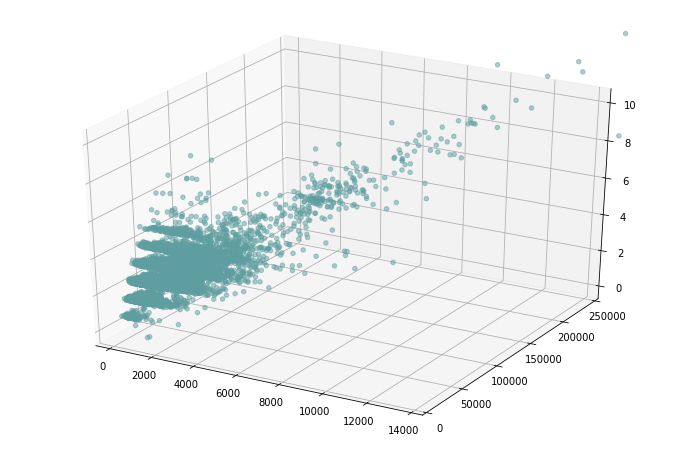

In [0]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# 방수, 면적, 집 크기 --> 시각화(3차원)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['sqft_living'], df['sqft_lot'], df['bedrooms'], c='cadetblue', alpha=0.5)
ax.set(ylim=[0,250000])

# Regression

In [0]:
from sklearn.model_selection import train_test_split
train_df1, train_df2 = train_test_split(df, train_size=0.8, random_state=42)

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [0]:
model = LinearRegression()
model.fit(train_df1[['sqft_living']], train_df1[['price']] )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# KNN
타겟값의 condition과 유클리디안 거리가 가까운것들 몇 개를 모아 값 유출

K means도 있는데 k 개씩 묶어서 클래스를 만들어 분석 

In [0]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import validation_curve
model = KNeighborsRegressor(n_neighbors = 3)

#model = DecisionTreeRegressor(random_state=42)

targetcol = ['sqft_living','bedrooms','bathrooms','sqft_lot','floors','zipcode','view','waterfront','grade','yr_built']


model.fit(train_df1[targetcol], train_df1['price'])
sccore = model.score(train_df2[targetcol], train_df2['price'])

print(format(score,'.3f'))




0.795


# Random Forest

In [0]:
model = RandomForestRegressor(random_state=42, n_estimators=35)

targetcol = ['sqft_living','bedrooms','bathrooms','sqft_lot','floors','zipcode','view','waterfront','grade','yr_built']


model.fit(train_df1[targetcol], train_df1['price'])
score = model.score(train_df2[targetcol], train_df2['price'])

#predicted = model.predict(train_d2[targetol])
print(format(score,'.3f'))

0.795


In [0]:
params = [15,30,40,50,120,150]
train_scoreNum, test_scoreNum = validation_curve(
                                RandomForestRegressor(),
                                X = train_df2[targetcol], y = train_df2['price'], 
                                param_name = 'n_estimators', 
                                param_range = params, cv = 3)

In [0]:


testdf = pd.read_csv(root+'housing_kaggle/test.csv')
predicted = model.predict(testdf[targetcol])

# #submission file creation
# ss = pd.read_csv(root+'housing_kaggle/sample_submission.csv')
# ss['price'] = predicted
# ss.to_csv('submission.csv', index=False)


## how to make it less useless
- 가중치
- 파생변수
- 아웃라이어 처리
- 값 -> 구간화
- 컬럼별 표준화/정규화
- 앙상블 모델 -- 모델 혼용

# Logistic Classification

In [0]:
import tensorflow as tf
xdata = [ [1,2], [2,3], [3,1], [4,3], [5,3], [6,2] ]
ydata = [ [0],[0],[0],[1],[1],[1] ]


In [0]:
x = tf.placeholder(tf.float32, shape=[None,2])
y = tf.placeholder(tf.float32, shape=[None,1])
w = tf.Variable(tf.random_normal([2,1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

hf = tf.sigmoid( tf.matmul(x,w)+b )

cost = -tf.reduce_mean( y*tf.log(hf) + (1-y)*(tf.log(1-hf)) )

predicted = tf.cast(hf>0.5, dtype=tf.float32) #turns true/false into 1/0

train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted,y), dtype=tf.float32))


with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for step in range(10001):
    trained, costvalue = sess.run([train, cost], feed_dict={x:xdata, y:ydata})
    if step %200 ==0:
      print(step, costvalue)
      
  hv,pv,av = sess.run([hf, predicted, accuracy], feed_dict={x:xdata, y:ydata})
  print('hf=', hv, 'pred=', pv, 'acc=', av)


## practice with uci breast cancer data

In [0]:
import numpy as np
xy = np.loadtxt('/content/drive/My Drive/T4IR/colab/0730data/0731/diabetes.csv', delimiter=',')
xdata = xy[:,0:-1]
ydata = xy[:,[-1]]
xdata.shape
ydata.shape

(759, 1)

In [0]:
import tensorflow as tf


x = tf.placeholder(tf.float32, shape=[None,8])
y = tf.placeholder(tf.float32, shape=[None,1])
w = tf.Variable(tf.random_normal([8,1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')
hf = tf.sigmoid( tf.matmul(x,w)+b )
cost = -tf.reduce_mean( y*tf.log(hf) + (1-y)*(tf.log(1-hf)) )
train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)
predicted = tf.cast(hf>0.5, dtype=tf.float32)
#################### how to manage hf value
#################### also cast is used because T/F problem
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted,y), dtype=tf.float32))


with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for step in range(20001):
    cv, _ = sess.run([cost, train], feed_dict={x:xdata, y:ydata})
    if step == 20000:
      print(step, costvalue)

      
# hv, pv, av = sess.run([hf, predicted, accuracy], feed_dict={x:xdata, y:ydata})
# print(hv, pv, av)

20000 0.1430047


# 회귀분석 모델 평가


## (결정계수, R  square)

실제값 - 예측값 = 잔차의 제곱의 합을 최소화

0 <= 결정계수 (설명력) <= 1


Q : 전체 데이터의 편차 제곱의 합

Qe : 전체 데이터의 잔차 제곱의 합

결정계수(R2) = (Q-Q2) / Q

LinearRegression 클래스의 score 함수를 통해 결정계수를 얻는다

In [0]:
#test_df = train_df2.copy()
score = model.score(test_df[['sqft_living']], test_df[['price']])
print(format(score, '.3f'))

0.484


In [0]:
predicted = model.predict(test_df[['sqft_living']])
print(predicted)

[[368244.47878762]
 [493639.69539596]
 [348295.23978175]
 ...
 [305546.87048345]
 [476540.34767664]
 [308396.76177   ]]


In [0]:
print(model.intercept_)
print(model.coef_)


[-53539.43162226]
[[284.98912866]]


In [0]:
targetcol = ['sqft_living','bedrooms','bathrooms','sqft_lot','floors','zipcode','view','waterfront','grade','yr_built']
model.fit(train_df1[targetcol], train_df1[['price']] )
score = model.score(train_df2[targetcol], train_df2[['price']] )
print(format(score, '.3f'))

0.657


# 분류모델에 대한 평가

##confusion_matrix

== 대각선에있는것들이 맞은것들

In [0]:
from sklearn.metrics import confusion_matrix
xtrue = [2,0,2,2,0,100]
xpred = [0,0,2,2,0,100]
confusion_matrix(xtrue, xpred)
 # 세 가지 value가 있으므로 3행3열

array([[2, 0, 0],
       [1, 2, 0],
       [0, 0, 1]])

## 이진분류 (pos/ neg)
ex) 불량품 분류기

- TP : 불량을 불량으로 맞게
- TN : 정상을 정상으로 맞게
- FP : 정상을 불량으로 틀리게
- FN : 불랑을 정상으로 틀리게



In [0]:
xtrue = [1,0,1,1,0,1]
xpred = [0,0,1,1,0,1]
confusion_matrix(xtrue, xpred)

array([[2, 0],
       [1, 3]])

- 정확도, Accuracy = (TP+TN)/ (TP+TN+FP+FN)
- 정밀도, Precision = TP / (TP+FP)
- 재현율, Recall = TP (TP+FN)
- F점수 = 2*정밀도*재현율 / (정밀도+재현율)